## Image Restoration:
In this short tutorial, we will employ **skimage.restoration.inpaint_biharmonic** function to undo the severe damage as much as possible in the following image:

In [45]:
#Import necessary libraries
import skimage.io
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import skimage.filters

(-0.5, 511.5, 717.5, -0.5)

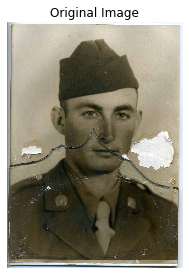

In [52]:
#Load damaged image:
damaged_image = skimage.io.imread('damaged_image.jpg')
#Rescale the image
image_rescaled = transform.rescale(damaged_image, 1/4,anti_aliasing=False, multichannel=True )
#Display the image
skimage.io.imshow(image_rescaled)
plt.title('Original Image')
plt.axis('off')

First, we need to denoise the image:

<ipython-input-53-36013d7c00b5>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  filtered_image  = skimage.filters.gaussian(image_rescaled,sigma=2)


(-0.5, 511.5, 717.5, -0.5)

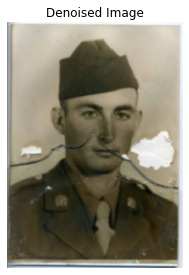

In [53]:
filtered_image  = skimage.filters.gaussian(image_rescaled,sigma=2)
skimage.io.imshow(filtered_image)
plt.title('Denoised Image')
plt.axis('off')

As we can see, some parts of the image are torn out. Our focus is to restore the white parts of the image as much as possible. For this, we will create a binary mask with the same shape as the image. The mask's pixels that correspond to the torn parts of the image will have a value of 1 (white), the rest will be 0 (black). The mask will then be used by inpaint_biharmonic() to restore the torn parts. 

(-0.5, 511.5, 717.5, -0.5)

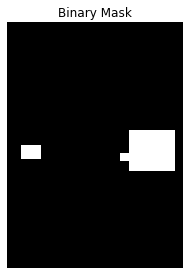

In [55]:
#Create a mask. The image's torn out parts will be 
#white in the mask, the rest of the mask will be black. 
mask = np.zeros(image_rescaled.shape[:-1])
mask[360:400,40:100]=1
mask[382:405, 330:357]=1
mask[315:435, 355:488]=1
#Display the mask:
skimage.io.imshow(mask)
plt.title('Binary Mask')
plt.axis('off')

(-0.5, 511.5, 717.5, -0.5)

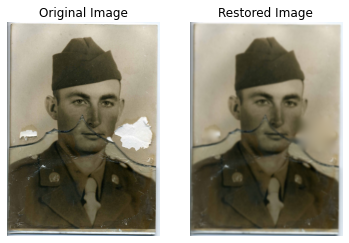

In [57]:
#Restore the image:
restored_image = skimage.restoration.inpaint_biharmonic(filtered_image, mask,  multichannel=True)
#Plot the restored image along with the original image:
f, ax = plt.subplots(1,2)
ax[0].imshow(image_rescaled)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(restored_image)
ax[1].set_title('Restored Image')
ax[1].axis('off')

Although, the restored image is still in need of more restoration; compared to the original one, we see a lot of improvements, especially on the right hand side of the image.   